# **COVID-19 Diagnosis Prediction Project**

* Goal: The assignment aims to predict COVID-19 diagnosis based on symptoms
and demographic data, utilizing data analysis and machine learning techniques.
* How: We use Python and MySQL for data analysis, EDA, feature engineering, and
machine learning to predict COVID-19 outcomes.
* Why: Our project is crucial for early COVID-19 detection, efficient healthcare
resource allocation, and informed public health decisions, improving overall wellbeing
---
---

**Q1 . Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**

ANS :

Predicting diseases accurately using machine learning, particularly for COVID-19, holds significant importance in today's world as early detection of such diseases on the basis of symptoms can help the healthcare facility to isolate and treat the patient timely, this is crucial to prevent the spread of disease.

**Q2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden.**

ANS -

Our Medical facilities are using tests such as RAT(Rapid Antigen Test) to detect whether a person is covid affected, while our ML model uses patient's data to detect whether a particular patient is covid affected or not with atmost accuracy, this will help to reduce the burden of testing and screening on health care fascilities.

**Q3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.**

ANS:

 A bad quality of data or missing data can prove to be a problem for such models but if it works well for COVID-19, we might use a similar approach for other diseases in the future. It's like having a valuable tool for our medical facilities.

 ## **Initial Hypothesis**

1.Prediction Hypothesis: We think we can predict COVID-19 by looking at symptoms and some personal info.

2.Benefits of Accurate Prediction: Accurate prediction can speed up treatment, resource use, and disease management, reducing the strain on healthcare.

3.Common Symptoms Hypothesis: COVID-19 often causes coughing, fever, and breathing problems.

4.Uncommon Symptoms Hypothesis: People without COVID-19 are less likely to have a sore throat or headache.

5.Symptoms in Specific Groups: Men with COVID-19 who've been in contact with people from other countries might have more coughing and fever.

6.Age and Severity Hypothesis: Those 60 and older might have more severe symptoms, especially trouble breathing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
import plotly.express as px
#importing the necessary libraries 

In [94]:
df_raw =pd.read_csv('corona_tested_006.csv')
df_raw

C:\Users\FAIZAN\AppData\Local\Temp\ipykernel_17036\1278216990.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw =pd.read_csv('corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [95]:
df_raw.shape # we have 278848 rows and 11 columns 

(278848, 11)

In [96]:
df =df_raw.copy() # hear i have created a copy of my original dataset with the variable of df
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [98]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [99]:
# checking all the uniques values in all the columns 

In [100]:
df['Test_date'].unique() # hear there is no nan values

array(['11-03-2020', '12-03-2020', '13-03-2020', '14-03-2020',
       '15-03-2020', '16-03-2020', '17-03-2020', '18-03-2020',
       '19-03-2020', '20-03-2020', '21-03-2020', '22-03-2020',
       '23-03-2020', '24-03-2020', '25-03-2020', '26-03-2020',
       '27-03-2020', '28-03-2020', '29-03-2020', '30-03-2020',
       '31-03-2020', '01-04-2020', '02-04-2020', '03-04-2020',
       '04-04-2020', '05-04-2020', '06-04-2020', '07-04-2020',
       '08-04-2020', '09-04-2020', '10-04-2020', '11-04-2020',
       '12-04-2020', '13-04-2020', '14-04-2020', '15-04-2020',
       '16-04-2020', '17-04-2020', '18-04-2020', '19-04-2020',
       '20-04-2020', '21-04-2020', '22-04-2020', '23-04-2020',
       '24-04-2020', '25-04-2020', '26-04-2020', '27-04-2020',
       '28-04-2020', '29-04-2020', '30-04-2020'], dtype=object)

In [101]:
df['Cough_symptoms'].unique() #there are nan vlaues in it

array([True, False, nan], dtype=object)

In [102]:
df['Fever'].unique() # HEAR IT IS NAN VALUS PRESENT 

array([False, True, nan], dtype=object)

In [103]:
df['Sore_throat'].unique()

array([True, False, nan], dtype=object)

In [104]:
df['Shortness_of_breath'].unique()

array([False, True, nan], dtype=object)

In [105]:
df['Headache'].unique()

array([False, True, nan], dtype=object)

In [106]:
df['Corona'].unique() # in this column other is notting but naa value

array(['negative', 'positive', 'other'], dtype=object)

In [107]:
df['Age_60_above'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [108]:
df['Sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [109]:
df['Known_contact'].unique() #in others values are present 

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [110]:
for columns in df:
    unique_values = df[columns].unique()
    print(columns , '=' , unique_values)

Ind_ID = [     1      2      3 ... 278846 278847 278848]
Test_date = ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms = [True False nan]
Fever = [False True nan]
Sore_throat = [True False nan]
Shortness_of_breath = [False True nan]
Headache = [False True nan]
Corona = ['negative' 'positive' 'other']
Age_60_above = [nan 'No' 'Yes']
Sex = [nan 'male' 'female'

In [111]:
df.isnull().sum() # so there are more nan values present in cought_symptoms, fever, age_above_60, sex 

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [113]:
df.drop(columns= ['Age_60_above', 'Sex'], axis= 1, inplace= True)

In [114]:
df.shape

(278848, 9)

In [115]:
df.isnull().sum()

Ind_ID                   0
Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
Known_contact            0
dtype: int64

In [116]:
df.dropna(inplace= True)

In [117]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Known_contact          0
dtype: int64

In [22]:
df.shape

(138172, 11)

In [118]:
df.duplicated().sum() #checking any dublicated values 

0

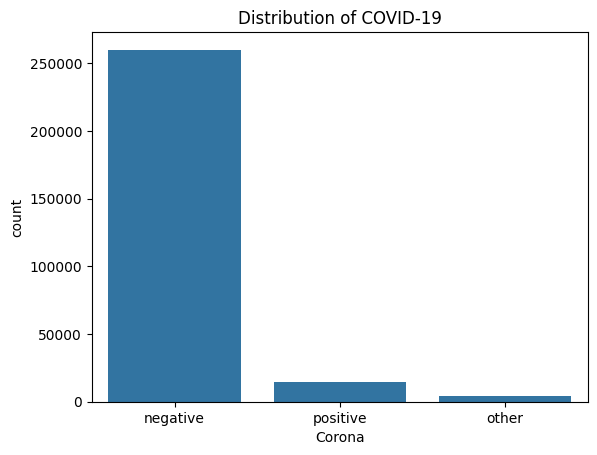

In [119]:
se.countplot(data= df, x= df['Corona'])
plt.title('Distribution of COVID-19')
plt.show()

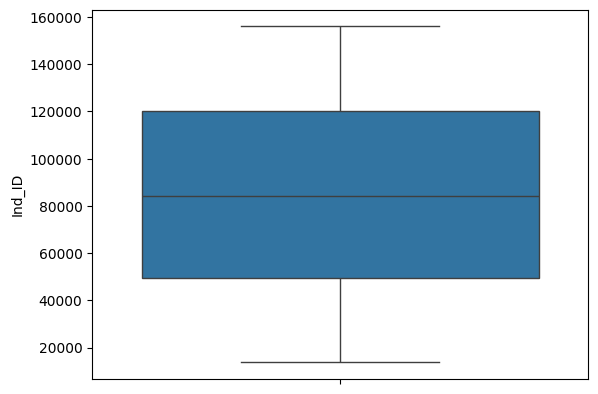

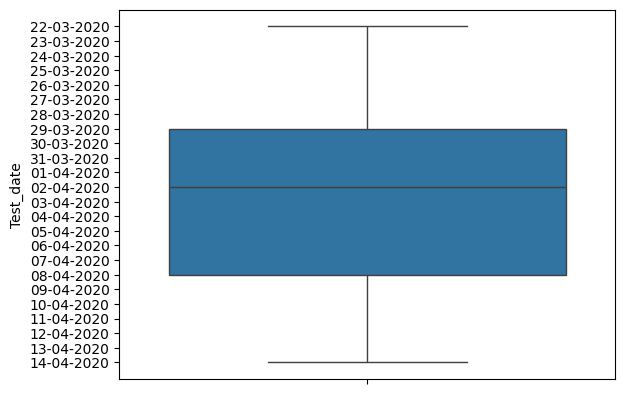

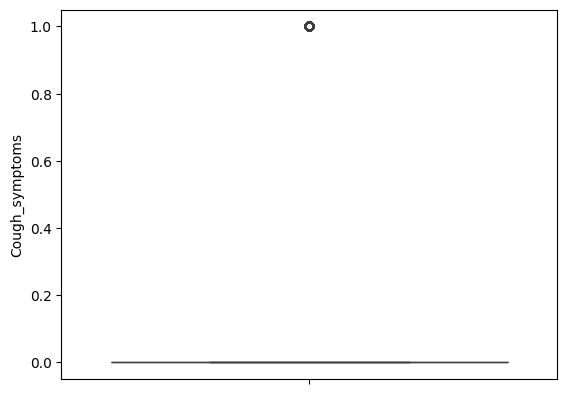

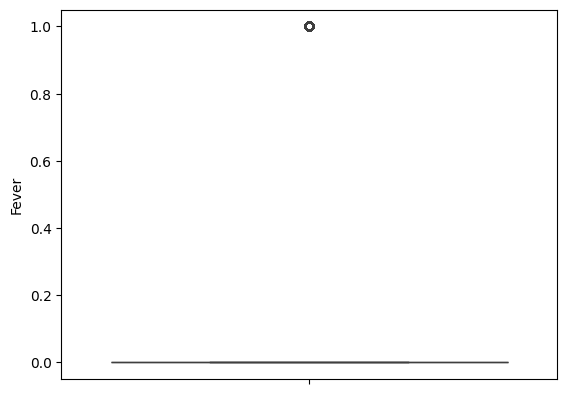

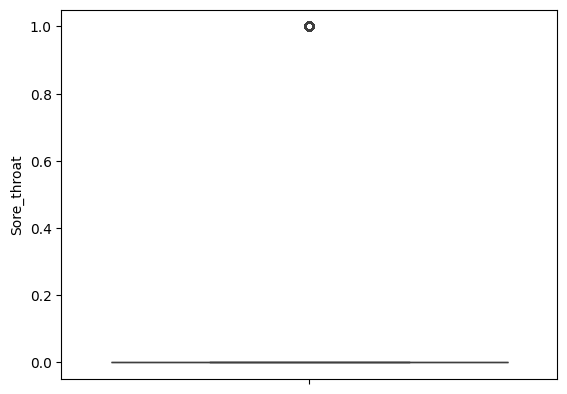

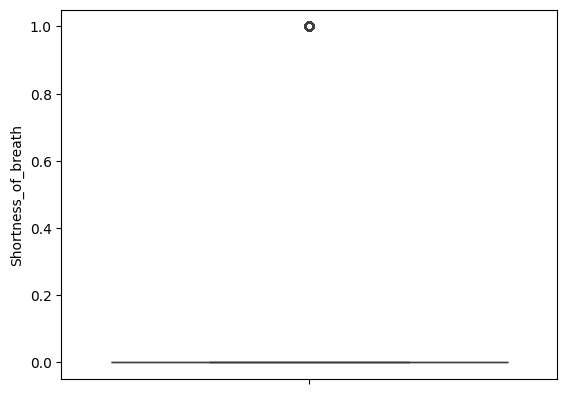

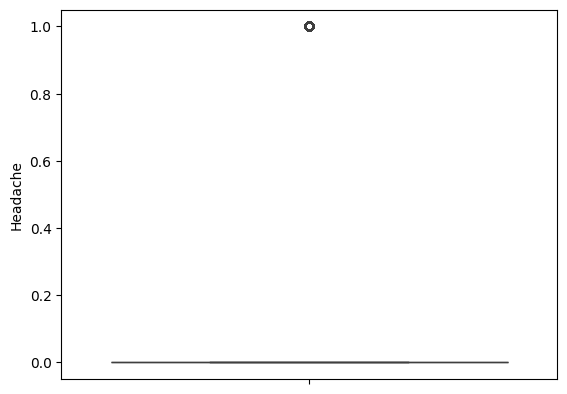

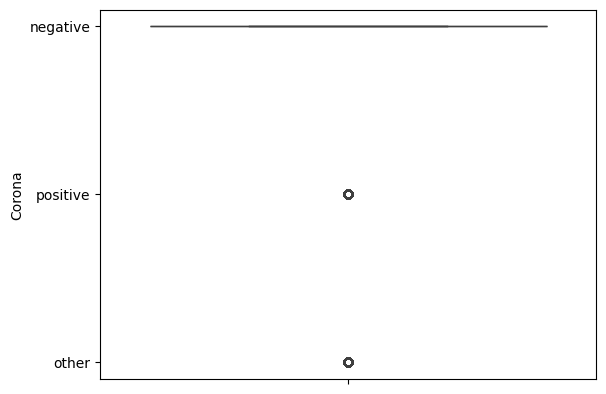

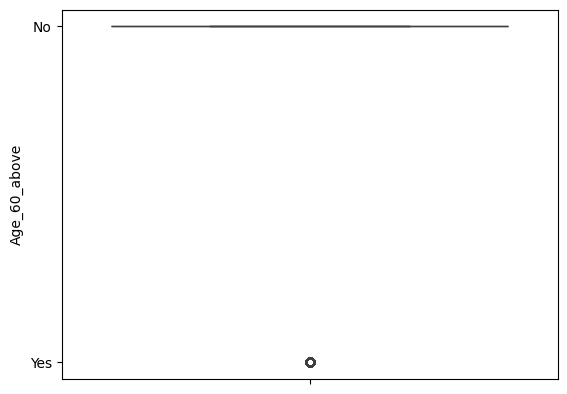

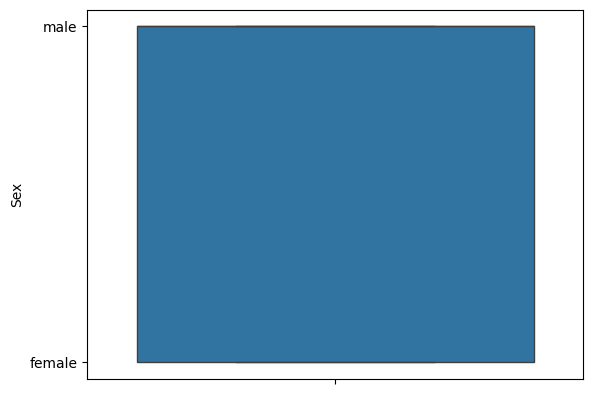

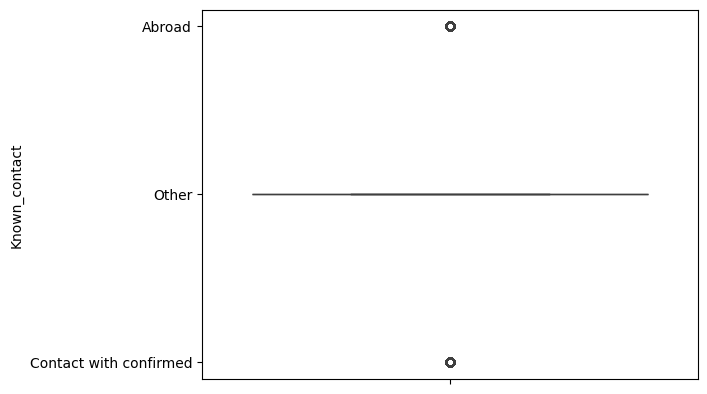

In [25]:
for i in df:
    se.boxplot(df[i])
    plt.show()

In [120]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,Other


In [121]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Known_contact'],
      dtype='object')

In [122]:
y = df['Corona'] # creating y variable hear to make it label encoding 
y

0         negative
1         positive
2         positive
3         negative
4         negative
            ...   
278843    positive
278844    negative
278845    negative
278846    negative
278847    negative
Name: Corona, Length: 278594, dtype: object

In [123]:
y.unique()

array(['negative', 'positive', 'other'], dtype=object)

In [124]:
y.replace({'negative' : 0 , 'positive' : 1, 'other' : 2}, inplace= True)

In [31]:
#now doing encoding for few columns and droping few columns 

In [125]:
df = pd.get_dummies(df[['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache', 'Known_contact']], drop_first= True)
df

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Known_contact_Contact with confirmed,Known_contact_Other
0,True,False,True,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,True
278844,False,False,False,False,False,False,True
278845,False,False,False,False,False,False,True
278846,False,False,False,False,False,False,True


In [126]:
df.replace({True : 1, False : 0}, inplace= True)
df

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Known_contact_Contact with confirmed,Known_contact_Other
0,1,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1
278844,0,0,0,0,0,0,1
278845,0,0,0,0,0,0,1
278846,0,0,0,0,0,0,1


In [127]:
df_raw['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [128]:
df['Known_contact_Contact'] = df_raw['Known_contact'].replace({'Abroad' : 0, 'Contact with confirmed' : 1, 'Other' : 2})

In [129]:
# therefore iam droping few columns and using some colums for creating a model 

In [130]:
df.drop(columns= ['Known_contact_Contact with confirmed', 'Known_contact_Other'], axis= 1, inplace= True)

In [131]:
x = df
x

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Known_contact_Contact
0,1,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
278843,0,0,0,0,0,2
278844,0,0,0,0,0,2
278845,0,0,0,0,0,2
278846,0,0,0,0,0,2


In [132]:
y

0         0
1         1
2         1
3         0
4         0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 278594, dtype: int64

# using train test data

In [133]:
from sklearn.model_selection import train_test_split

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state= 346)

print('Total -', df.shape)
print("X_train shape:", x_train.shape)
print("X_val shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)

model = LogisticRegression()
model.fit(x_train, y_train)

train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(train_prediction, y_train)
test_prediction = model.predict(x_test)
test_accuracy  = accuracy_score(test_prediction, y_test)

Logistic_model = round(test_accuracy * 100, 2)

print('train_accuracy = ', train_accuracy)
print('test_accuracy = ',  test_accuracy)
print('This model is LogisticRegression -', Logistic_model)


Total - (278594, 6)
X_train shape: (222875, 6)
X_val shape: (55719, 6)
y_train shape: (222875,)
y_val shape: (55719,)
train_accuracy =  0.943111609646663
test_accuracy =  0.9461045603833522
This model is LogisticRegression - 94.61


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state= 346)

print('Total -', df.shape)
print("X_train shape:", x_train.shape)
print("X_val shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)

model = RandomForestClassifier()
model.fit(x_train, y_train)

train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(train_prediction, y_train)
test_prediction = model.predict(x_test)
test_accuracy  = accuracy_score(test_prediction, y_test)

RandomForest_model = round(test_accuracy * 100, 2)

print('train_accuracy = ', train_accuracy)
print('test_accuracy = ',  test_accuracy)
print('This model is RandomForestClassifier-', RandomForest_model)

Total - (278594, 6)
X_train shape: (222875, 6)
X_val shape: (55719, 6)
y_train shape: (222875,)
y_val shape: (55719,)
train_accuracy =  0.9538620302860348
test_accuracy =  0.9552935264451983
This model is RandomForestClassifier- 95.53


In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state= 346)

print('Total -', df.shape)
print("X_train shape:", x_train.shape)
print("X_val shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(train_prediction, y_train)
test_prediction = model.predict(x_test)
test_accuracy  = accuracy_score(test_prediction, y_test)

DecisionTree_model = round(test_accuracy * 100, 2)

print('train_accuracy = ', train_accuracy)
print('test_accuracy = ',  test_accuracy)
print('This model is DecisionTreeClassifier -', DecisionTree_model)

Total - (278594, 6)
X_train shape: (222875, 6)
X_val shape: (55719, 6)
y_train shape: (222875,)
y_val shape: (55719,)
train_accuracy =  0.9538620302860348
test_accuracy =  0.9552755792458587
This model is DecisionTreeClassifier - 95.53


In [149]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 346)

print('Total -', df.shape)
print("X_train shape:", x_train.shape)
print("X_val shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)

model = AdaBoostClassifier()
model.fit(x_train, y_train)

train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(train_prediction, y_train)
test_prediction = model.predict(x_test)
test_accuracy  = accuracy_score(test_prediction, y_test)

AdaBoost_model = round(test_accuracy * 100,2)

print('train_accuracy = ', train_accuracy)
print('test_accuracy = ',  test_accuracy)
print('This model is AdaBoostClassifier', AdaBoost_model)

Total - (278594, 6)
X_train shape: (222875, 6)
X_val shape: (55719, 6)
y_train shape: (222875,)
y_val shape: (55719,)
train_accuracy =  0.9444397083567022
test_accuracy =  0.9468045011575944
This model is AdaBoostClassifier 94.68


In [161]:
print('AdaBoost_model = ' , AdaBoost_model)
print('DecisionTree_model = ', DecisionTree_model)
print('RandomForest_model = ', RandomForest_model)
print('Logistic_model =', Logistic_model)

AdaBoost_model =  94.68
DecisionTree_model =  95.53
RandomForest_model =  95.53
Logistic_model = 94.61


In [167]:
# ploting all the 4 models 
four_models = AdaBoost_model, DecisionTree_model, RandomForest_model, Logistic_model
accuracyscores = ['AdaBoost_model', 'DecisionTree_model', 'RandomForest_model', 'Logistic_model']

In [176]:
import plotly.express as px

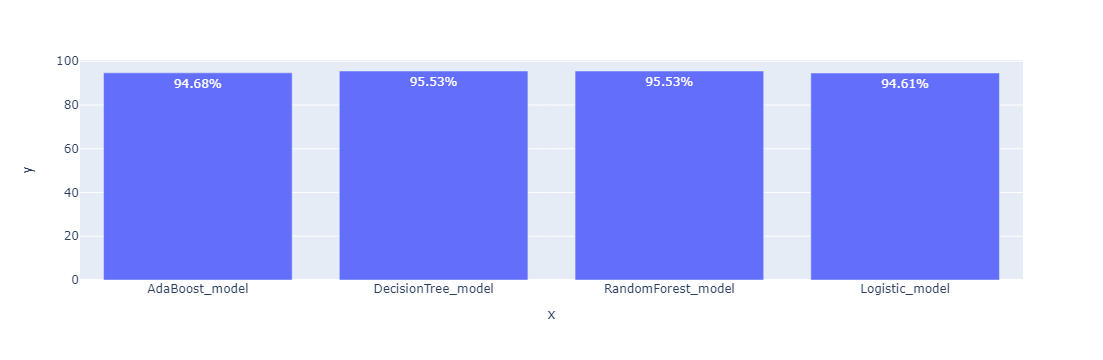

In [174]:
px.bar(x = accuracyscores, y = four_models ,  text=[f'{score}%' for score in four_models])

# **Conclusion**
* The highest accuracy our model achieved was 95.53%.
* The best models are DecisionTree_model and RandomForest_model 